In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [2]:
cells = np.load("cell_channels.npy", allow_pickle=True)
labels = np.load("cell_labels.npy", allow_pickle=True)

In [3]:
with open("keren/meta.yaml", "r") as f:
    metadata = yaml.safe_load(f)

meta_cell = metadata['cell_types']
meta_channel = metadata['channels']

In [4]:
expression_panel = np.zeros((np.max(labels) + 1, cells.shape[3]))

In [5]:
for i, cell in enumerate(cells):
    ctype = labels[i]
    cell_avg = np.mean(cell, axis=(0,1))
    expression_panel[ctype] += cell_avg

expression_panel /= cells.shape[0]

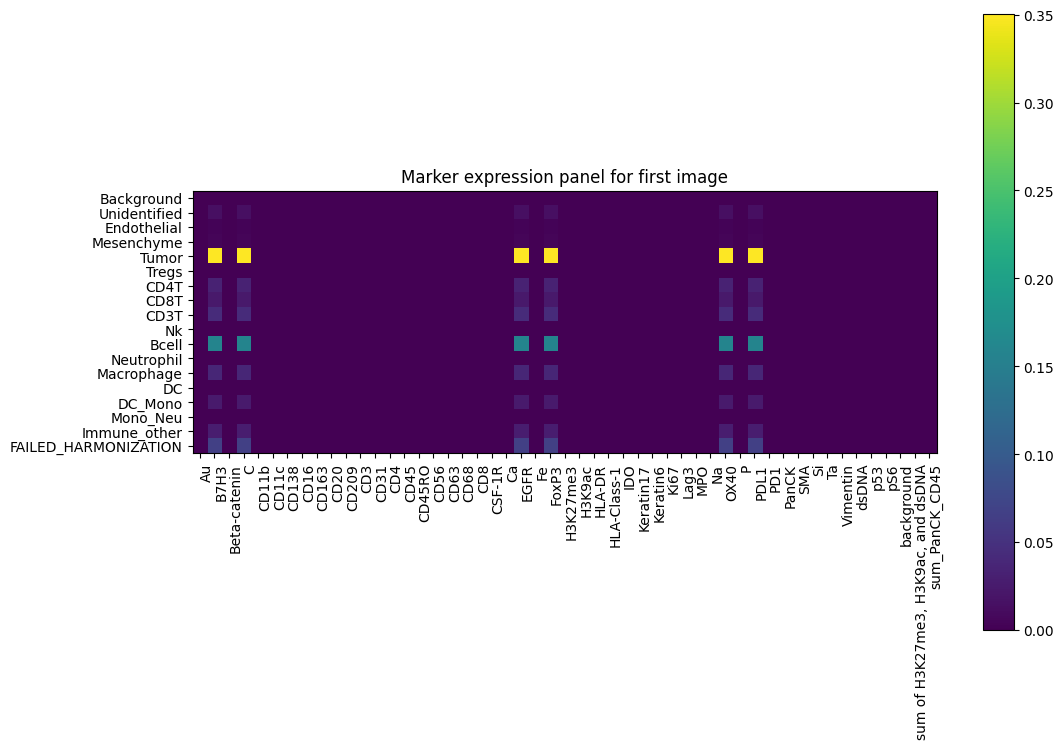

<Figure size 640x480 with 0 Axes>

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(expression_panel)
cbar=ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(meta_channel)))
ax.set_yticks(np.arange(len(meta_cell)))
ax.set_xticklabels(meta_channel)
ax.set_yticklabels(meta_cell.values())
ax.set_title("Marker expression panel for first image")
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
plt.show()
plt.savefig("marker_expression.png")

In [7]:
con_mat = np.load('confusion_matrix.npy')

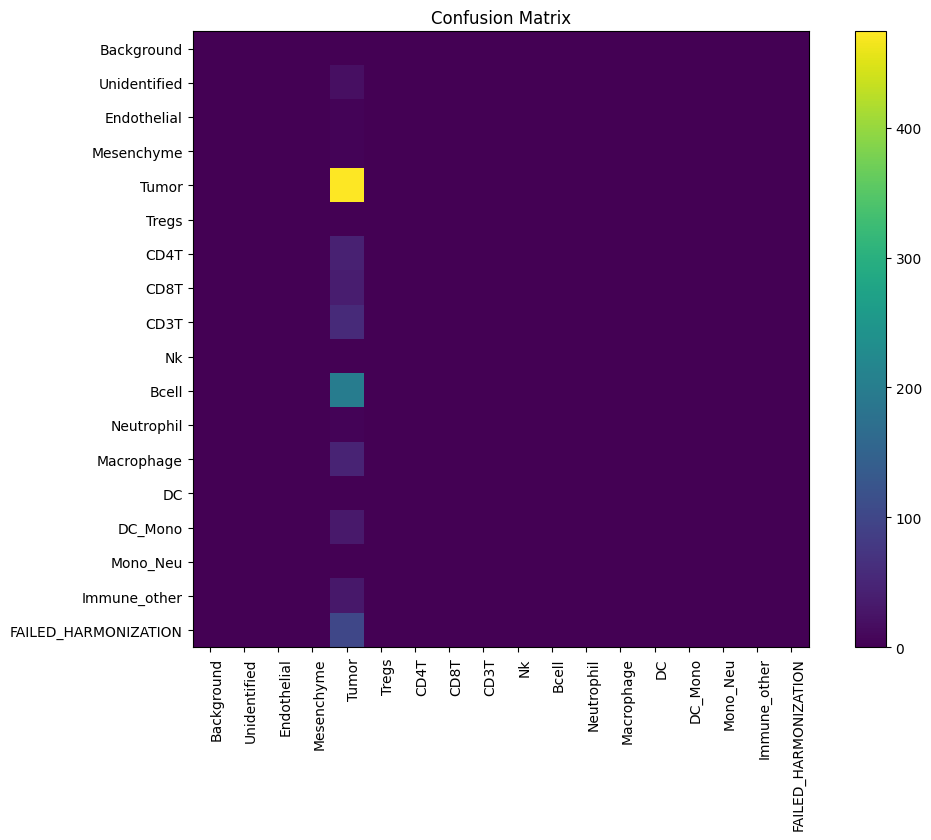

<Figure size 640x480 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(con_mat)
cbar=ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(meta_cell)))
ax.set_yticks(np.arange(len(meta_cell)))
ax.set_xticklabels(meta_cell.values())
ax.set_yticklabels(meta_cell.values())
ax.set_title("Confusion Matrix")
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
plt.show()
plt.savefig("confusion_matrix.png")